In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#actual_positive_rate = 0.3
#precision = 0.61
#recall = 0.65
#num_instances = 1000

In [ ]:
def calculate_confusion_matrix_from_rates(actual_positive_rate, precision, recall, num_instances):

    if not (0 <= actual_positive_rate <= 1 and 0 <= precision <= 1 and 0 <= recall <= 1 and num_instances > 0):
        return None

    if recall == 0:
        return None

    tp = recall * actual_positive_rate * num_instances
    if precision == 0 and tp != 0:
        return None

    if precision == 0:
        fp = 0
    else:
        fp = (tp / precision) - tp

    fn = (actual_positive_rate * num_instances) - tp

    tn = num_instances - (tp + fp + fn)

    if tp < 0 or fp < 0 or fn < 0 or tn < 0:
        return None

    return {
        'TP': round(tp),
        'FP': round(fp),
        'FN': round(fn),
        'TN': round(tn),
    }

def calculate_metrics_from_rates(actual_positive_rate, precision, recall, num_instances):

  confusion_matrix = calculate_confusion_matrix_from_rates(actual_positive_rate,precision,recall,num_instances)

  if confusion_matrix is None:
    return None

  tp = confusion_matrix['TP']
  fp = confusion_matrix['FP']
  fn = confusion_matrix['FN']
  tn = confusion_matrix['TN']

  if num_instances == 0:
    return None

  accuracy = (tp + tn) / num_instances

  if precision + recall == 0:
      f1_score = 0
  else:
      f1_score = 2 * (precision * recall) / (precision + recall)

  return {
    'confusion_matrix': confusion_matrix,
    'accuracy': round(accuracy, 2),
    'f1_score': round(f1_score, 2)
  }

print(calculate_metrics_from_rates(actual_positive_rate, precision, recall, num_instances))

In [ ]:
confusion_matrix = calculate_confusion_matrix_from_rates(actual_positive_rate, precision, recall, num_instances)

if confusion_matrix:
    matrix = np.array([[confusion_matrix['TP'], confusion_matrix['FP']],
                       [confusion_matrix['FN'], confusion_matrix['TN']]])

    fig, ax = plt.subplots()
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', ax=ax)

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Positive', 'Negative'])
    ax.yaxis.set_ticklabels(['Positive', 'Negative'])

    plt.show()
else:
    print("Invalid confusion matrix values.")

In [21]:
tp = 290
fp = 150
fn = 10
tn = 550

In [22]:
def calculate_rates_from_confusion_matrix(tp, fp, fn, tn):
    if tp + fp == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)

    if tp + fn == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)

    if tp + tn + fp + fn == 0:
        accuracy = 0
    else:
        accuracy = (tp + tn) / (tp + tn + fp + fn)

    return {
        'precision': round(precision, 2),
        'recall': round(recall, 2),
        'accuracy': round(accuracy, 2)
    }

rates = calculate_rates_from_confusion_matrix(tp, fp, fn, tn)
print(rates)

{'precision': 0.66, 'recall': 0.97, 'accuracy': 0.84}


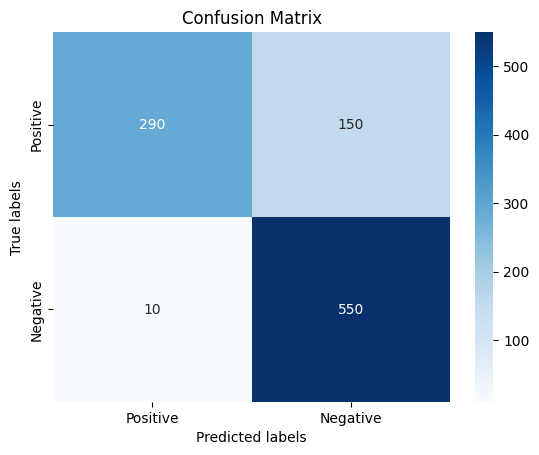

In [23]:
matrix = np.array([[tp, fp],
                   [fn, tn]])

fig, ax = plt.subplots()
sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Positive', 'Negative'])
ax.yaxis.set_ticklabels(['Positive', 'Negative'])

plt.show()